# 6.3 Geographical Visualistaions with Python

## Contents

### 01. Importing Libraries

### 02. Data Wrangling

### 03. Cleaning Data

### 04. Plotting Choropleth Maps

#### 01. Importing Libraries

In [15]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import geopandas as gpd
from shapely.geometry import Point

In [16]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [17]:
# Load neighborhoods GeoJSON
neighborhoods = gpd.read_file("/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6/6.3/2020 Neighborhood Tabulation Areas (NTAs)_20250617.geojson")

In [18]:
# Check columns and preview
print(neighborhoods.columns)
print(neighborhoods.head())

Index(['shape_area', 'ntaname', 'cdtaname', 'shape_leng', 'boroname',
       'ntatype', 'nta2020', 'borocode', 'countyfips', 'ntaabbrev', 'cdta2020',
       'geometry'],
      dtype='object')
      shape_area             ntaname  \
0  35321809.1041          Greenpoint   
1  28852852.7038        Williamsburg   
2  15208960.7339  South Williamsburg   
3  52267407.9898   East Williamsburg   
4  9982321.59069    Brooklyn Heights   

                                            cdtaname     shape_leng  boroname  \
0     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28919.5608108  Brooklyn   
1     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28134.0823238  Brooklyn   
2     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  18250.2805432  Brooklyn   
3     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  43184.7989883  Brooklyn   
4  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...  14312.5049745  Brooklyn   

  ntatype nta2020 borocode countyfips  ntaabbrev cdta2020  \
0       0  BK0101  

In [19]:
# Create path
path = "/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 6"

In [20]:
# Import cleaned bike data
df = pd.read_csv(os.path.join(path, '6.1', 'Open_Source_Data', 'cleaned_bike_data.csv'))

In [21]:
# Check data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,334.0,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,513.0,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,441.0,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,432.0,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False


In [22]:
# Check shape
df.shape

(47063, 19)

#### 02. Data Wrangling

In [23]:
# Check columns and preview
print(neighborhoods.columns)
print(neighborhoods.head())

Index(['shape_area', 'ntaname', 'cdtaname', 'shape_leng', 'boroname',
       'ntatype', 'nta2020', 'borocode', 'countyfips', 'ntaabbrev', 'cdta2020',
       'geometry'],
      dtype='object')
      shape_area             ntaname  \
0  35321809.1041          Greenpoint   
1  28852852.7038        Williamsburg   
2  15208960.7339  South Williamsburg   
3  52267407.9898   East Williamsburg   
4  9982321.59069    Brooklyn Heights   

                                            cdtaname     shape_leng  boroname  \
0     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28919.5608108  Brooklyn   
1     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28134.0823238  Brooklyn   
2     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  18250.2805432  Brooklyn   
3     BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  43184.7989883  Brooklyn   
4  BK02 Downtown Brooklyn-Fort Greene (CD 2 Appro...  14312.5049745  Brooklyn   

  ntatype nta2020 borocode countyfips  ntaabbrev cdta2020  \
0       0  BK0101  

In [24]:
# Check actual name
print(neighborhoods.columns)

Index(['shape_area', 'ntaname', 'cdtaname', 'shape_leng', 'boroname',
       'ntatype', 'nta2020', 'borocode', 'countyfips', 'ntaabbrev', 'cdta2020',
       'geometry'],
      dtype='object')


In [26]:
# Create geometry column for start stations
geometry_start = [Point(xy) for xy in zip(df['start_station_longitude'], df['start_station_latitude'])]
gdf_start = gpd.GeoDataFrame(df, geometry=geometry_start, crs="EPSG:4326")

# Create geometry column for end stations
geometry_end = [Point(xy) for xy in zip(df['end_station_longitude'], df['end_station_latitude'])]
gdf_end = gpd.GeoDataFrame(df, geometry=geometry_end, crs="EPSG:4326")

In [27]:
# Replace 'neighborhood_name_column' with actual column that contains neighborhood names from GeoJSON
gdf_start_with_neigh = gpd.sjoin(
    gdf_start, neighborhoods[['geometry', 'ntaname']], how='left', predicate='within'
)
gdf_end_with_neigh = gpd.sjoin(
    gdf_end, neighborhoods[['geometry', 'ntaname']], how='left', predicate='within'
)

# Preview results
print(gdf_start_with_neigh[['start_station_latitude', 'start_station_longitude', 'ntaname']].head())
print(gdf_end_with_neigh[['end_station_latitude', 'end_station_longitude', 'ntaname']].head())

   start_station_latitude  start_station_longitude               ntaname
0               40.754666               -73.991382  Midtown-Times Square
1               40.719392               -74.002472  Tribeca-Civic Center
2               40.760193               -73.991255        Hell's Kitchen
3               40.743156               -73.974347  Murray Hill-Kips Bay
4               40.730287               -73.990765     Greenwich Village
   end_station_latitude  end_station_longitude                  ntaname
0             40.742388             -73.997262     Chelsea-Hudson Yards
1             40.728419             -73.987140             East Village
2             40.768254             -73.988639           Hell's Kitchen
3             40.756014             -73.967416  East Midtown-Turtle Bay
4             40.726218             -73.983799             East Village


In [28]:
# The spatial join GeoDataFrame has the neighborhood name column 'ntaname'
# It also keeps the original index of my data, so I can align it

# Add neighborhood column for start stations to the original DF
df['start_neighborhood'] = gdf_start_with_neigh['ntaname'].values

# Add neighborhood column for end stations to the original DF
df['end_neighborhood'] = gdf_end_with_neigh['ntaname'].values

In [29]:
# Check data
df.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,birth_year_missing,start_neighborhood,end_neighborhood
0,LnQzQk,16013.0,Mon,18.0,09/09/2013 18:18,523.0,W 38 St & 8 Ave,40.754666,-73.991382,09/09/2013 18:35,...,W 20 St & 7 Ave,40.742388,-73.997262,993.0,Subscriber,1968.0,female,False,Midtown-Times Square,Chelsea-Hudson Yards
1,IL9boN,15230.0,Thu,18.0,12/09/2013 18:38,257.0,Lispenard St & Broadway,40.719392,-74.002472,12/09/2013 18:48,...,St Marks Pl & 2 Ave,40.728419,-73.987140,581.0,Subscriber,1983.0,male,False,Tribeca-Civic Center,East Village
2,46clGB,17942.0,Wed,19.0,18/09/2013 19:44,479.0,9 Ave & W 45 St,40.760193,-73.991255,18/09/2013 19:50,...,W 56 St & 10 Ave,40.768254,-73.988639,361.0,Subscriber,1989.0,male,False,Hell's Kitchen,Hell's Kitchen
3,v7vdFt,19683.0,Sat,11.0,28/09/2013 11:54,527.0,E 33 St & 1 Ave,40.743156,-73.974347,28/09/2013 12:03,...,E 52 St & 2 Ave,40.756014,-73.967416,561.0,Subscriber,1988.0,female,False,Murray Hill-Kips Bay,East Midtown-Turtle Bay
4,HbKJBz,14581.0,Fri,22.0,27/09/2013 22:01,293.0,Lafayette St & E 8 St,40.730287,-73.990765,27/09/2013 22:08,...,E 7 St & Avenue A,40.726218,-73.983799,427.0,Subscriber,1986.0,female,False,Greenwich Village,East Village


In [30]:
# Check shape
df.shape

(47063, 21)

#### 03. Data Cleaning

In [31]:
# Check for missing values
df.isnull().sum()

trip_id                       0
bike_id                       0
weekday                       0
start_hour                    0
start_time                    0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_time                      0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
trip_duration                 0
subscriber                    0
birth_year                    0
gender                     6116
birth_year_missing            0
start_neighborhood            0
end_neighborhood              0
dtype: int64

##### **For now, I will keep the NaNs, I will not drop or impute. I may require gender-related analysis later. If I drop the rows, I will lose a significant portion of my data (14%), and those trips might still be useful for non-gender-based insights. If I impute gender, I will introduce bias and possibly distort gender distribution. Gender is categorical, so median/mode imputation isn't reliable here. Instead, I will filter when needed, e.g. I will exclude the NaN entries in my queries or visualisations.**

In [32]:
# Check for duplicates
dups = df.duplicated() # no duplicates

In [33]:
dups.shape

(47063,)

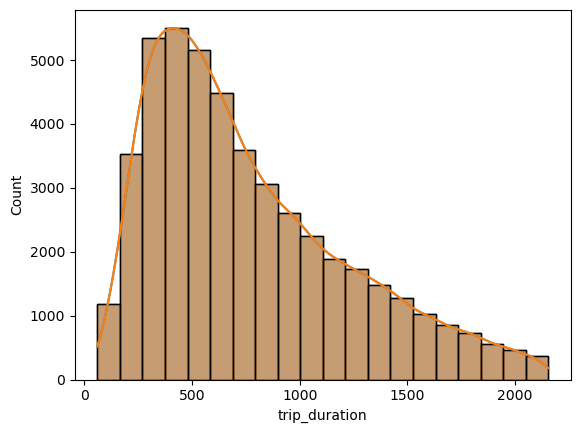

In [35]:
# Extreme value checks 
import matplotlib.pyplot as plt
sns.histplot(df['trip_duration'], bins=20, kde = True) # shows extreme values for 'trip_duration'
plt.show()

##### No extreme values.

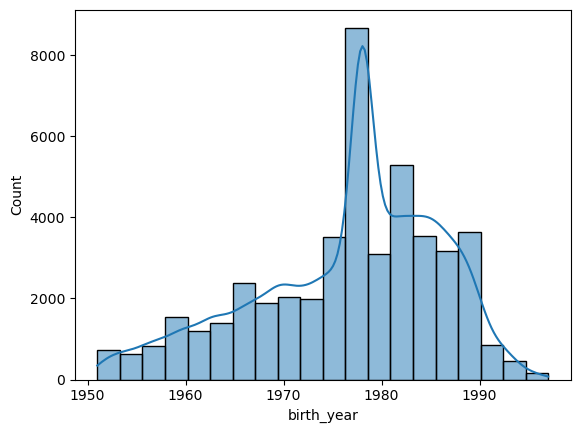

In [36]:
# Extreme value checks 
sns.histplot(df['birth_year'], bins=20, kde = True) # shows extreme values for 'birth_year'
plt.show()

##### No extreme values.

#### 04. Plotting Choropleth Maps

In [42]:
# Create a DF with just the neighborhood and the values for trip_duration plotted
data_to_plot = df[['start_neighborhood','trip_duration']]

# Export it to CSV for Tableau
data_to_plot.to_csv('trip_duration_by_neighborhood.csv', index=False)

# Check shape
data_to_plot.head()

,start_neighborhood,trip_duration
0,Midtown-Times Square,993.0
1,Tribeca-Civic Center,581.0
2,Hell's Kitchen,361.0
3,Murray Hill-Kips Bay,561.0
4,Greenwich Village,427.0


In [43]:
# Filter the GeoDataFrame
matched_geo = neighborhoods[neighborhoods['ntaname'].isin(data_to_plot['start_neighborhood'])]

In [44]:
# Convert that filtered GeoDataFrame to GeoJSON
matched_geo_json = matched_geo.to_json()

In [45]:
# Create the map centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Create the choropleth only for matched neighborhoods
folium.Choropleth(
    geo_data=matched_geo_json,  # use the filtered GeoJSON
    data=data_to_plot,
    columns=['start_neighborhood', 'trip_duration'],
    key_on='feature.properties.ntaname',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    legend_name="Trip Duration"
).add_to(m)

folium.LayerControl().add_to(m)
m

##### **The choropleth map visualises the average trip duration for rides originating in each neighbourhood, revealing clear spatial patterns in usage. The darkest-shaded areas — Williamsburg and Battery Park City — exhibit the longest average trip durations, which may be due to a scarcity of nearby stations, limited rebalancing efforts, or a higher proportion of casual users, such as tourists, who typically take longer rides. These are followed by slightly lighter-shaded neighboruhoods, including Downtown Brooklyn, the Lower East Side, and much of Manhattan Island, which also show relatively high trip durations. These areas are likely high-traffic zones where trips are more consistent in duration, possibly driven by commuters or regular local riders. In contrast, neighbourhoods with lighter shading outside these clusters likely experience shorter, more frequent utility rides or simply fewer overall trips.**

##### **Research Questions Answered:**
##### **Question: "Where should future stations or rebalancing efforts be focused?"**
##### **This visualisation supports identifying neighbourhood-level service gaps. For instance, Williamsburg and Battery Park City may benefit from additional stations and more frequent rebalancing to meet longer or underserved trip patterns. Further, the pattern of high durations in key areas suggests demand pressure that can guide targeted operational strategies.**

##### **New Research Questions Arising:**
##### **1. Are longer trip durations in places like Williamsburg due to a lack of nearby stations or the presence of tourists? **
##### **Segmenting the data by user type (subscriber vs. casual) would clarify the role of tourism vs. commuting behaviour.**
##### **2. Do these neighborhoods also see high trip counts, or just longer durations?**
##### **Overlaying trip frequency alongside duration would help distinguish between volume and distance/time issues.**
##### **3. Are trips from long-duration zones ending in station-poor destinations?**
##### **A destination-based map could reveal whether riders from these neighbourhoods face station scarcity at trip endpoints, contributing to longer durations.**

##### **Ethical and Temporal Considerations**
##### **Missing demographic data, especially birth year and gender, limits deeper analysis of who is using bikes in these high-duration zones. Since the data is from 2013, it doesn’t reflect recent infrastructure changes or updated riding patterns (e.g. e-bikes, new protected lanes). Any planning implications should be clearly framed as exploratory and historically bound.**

In [46]:
m.save('plot_data.html')